In [5]:
from google.colab import files
uploaded = files.upload()


Saving data.zip to data.zip


In [6]:
!unzip data.zip -d /content/data/


Archive:  data.zip
   creating: /content/data/data/
  inflating: /content/data/data/AZDIAS_Feature_Summary.csv  
  inflating: /content/data/data/Data_Dictionary.md  
  inflating: /content/data/data/Udacity_AZDIAS_Subset.csv  
  inflating: /content/data/data/Udacity_CUSTOMERS_Subset.csv  


In [7]:
!ls -R /content


/content:
data  data.zip	sample_data

/content/data:
data

/content/data/data:
AZDIAS_Feature_Summary.csv  Udacity_AZDIAS_Subset.csv
Data_Dictionary.md	    Udacity_CUSTOMERS_Subset.csv

/content/sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set(style="whitegrid")
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
%matplotlib inline


In [9]:
DATA_DIR = "/content/data/data"

AZDIAS_PATH = f"{DATA_DIR}/Udacity_AZDIAS_Subset.csv"
CUSTOMERS_PATH = f"{DATA_DIR}/Udacity_CUSTOMERS_Subset.csv"
FEAT_INFO_PATH = f"{DATA_DIR}/AZDIAS_Feature_Summary.csv"

AZDIAS_PATH, CUSTOMERS_PATH, FEAT_INFO_PATH


('/content/data/data/Udacity_AZDIAS_Subset.csv',
 '/content/data/data/Udacity_CUSTOMERS_Subset.csv',
 '/content/data/data/AZDIAS_Feature_Summary.csv')

In [10]:
import pandas as pd

azdias = pd.read_csv(AZDIAS_PATH, sep=";")
customers = pd.read_csv(CUSTOMERS_PATH, sep=";")
feat_info = pd.read_csv(FEAT_INFO_PATH, sep=";")

azdias.shape, customers.shape, feat_info.shape


((891221, 85), (191652, 85), (85, 4))

In [11]:
azdias.head()
azdias.info()
azdias.isna().mean().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

KK_KUNDENTYP    0.655967
KBA05_BAUMAX    0.149597
KBA05_ANTG2     0.149597
MOBI_REGIO      0.149597
KBA05_GBZ       0.149597
KBA05_ANTG1     0.149597
KBA05_ANTG4     0.149597
KBA05_ANTG3     0.149597
KKK             0.135989
REGIOTYP        0.135989
dtype: float64

In [14]:
import numpy as np

azdias_clean = azdias.copy()

missing_value_map = {}

for idx, row in feat_info.iterrows():
    col = row["attribute"]
    raw_codes = row["missing_or_unknown"]

    # If empty or NaN → no missing codes
    if pd.isna(raw_codes) or raw_codes.strip() == "":
        missing_value_map[col] = []
        continue

    # Try to parse the values safely
    try:
        # CASE 1: It's a list-like string: "[-1, 0]"
        if raw_codes.startswith("[") and raw_codes.endswith("]"):
            # Remove brackets and split
            codes = raw_codes.strip("[]").split(",")
            codes = [c.strip().strip("'").strip('"') for c in codes]
        else:
            # CASE 2: It's a single value: "-1"
            codes = [raw_codes.strip()]
    except:
        # Anything else → treat as single raw value
        codes = [raw_codes.strip()]

    # Convert numeric strings to integers where possible
    cleaned_codes = []
    for c in codes:
        try:
            cleaned_codes.append(int(c))
        except:
            cleaned_codes.append(c)

    missing_value_map[col] = cleaned_codes

# Apply missing value replacements
for col, codes in missing_value_map.items():
    if col in azdias_clean.columns and len(codes) > 0:
        azdias_clean[col] = azdias_clean[col].replace(codes, np.nan)

# Show updated missingness
azdias_clean.isna().mean().sort_values(ascending=False).head(15)


TITEL_KZ          0.997576
AGER_TYP          0.769554
KK_KUNDENTYP      0.655967
KBA05_BAUMAX      0.534687
GEBURTSJAHR       0.440203
ALTER_HH          0.348137
KKK               0.177357
REGIOTYP          0.177357
W_KEIT_KIND_HH    0.166051
KBA05_ANTG1       0.149597
KBA05_GBZ         0.149597
KBA05_ANTG2       0.149597
KBA05_ANTG3       0.149597
KBA05_ANTG4       0.149597
MOBI_REGIO        0.149597
dtype: float64

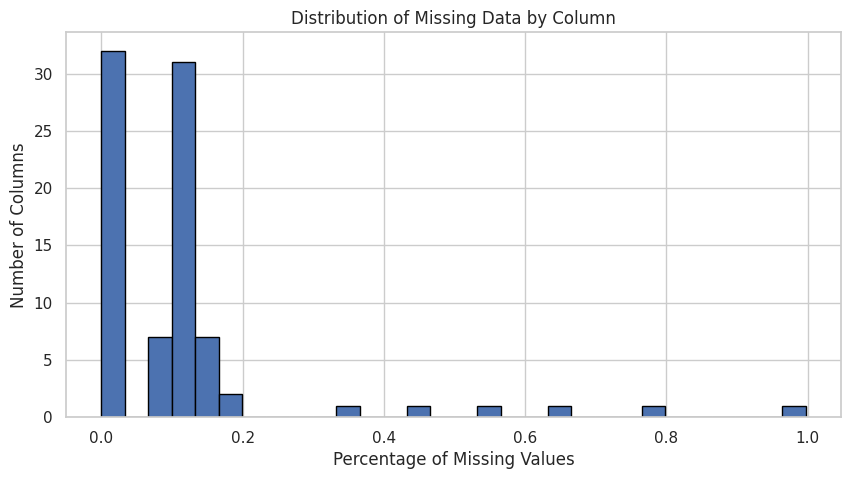

TITEL_KZ          0.997576
AGER_TYP          0.769554
KK_KUNDENTYP      0.655967
KBA05_BAUMAX      0.534687
GEBURTSJAHR       0.440203
ALTER_HH          0.348137
KKK               0.177357
REGIOTYP          0.177357
W_KEIT_KIND_HH    0.166051
KBA05_ANTG1       0.149597
KBA05_GBZ         0.149597
KBA05_ANTG2       0.149597
KBA05_ANTG3       0.149597
KBA05_ANTG4       0.149597
MOBI_REGIO        0.149597
PLZ8_ANTG2        0.130736
PLZ8_ANTG3        0.130736
PLZ8_BAUMAX       0.130736
PLZ8_ANTG4        0.130736
PLZ8_HHZ          0.130736
dtype: float64

In [15]:
missing_perc = azdias_clean.isna().mean()

plt.figure(figsize=(10,5))
plt.hist(missing_perc, bins=30, edgecolor="black")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Number of Columns")
plt.title("Distribution of Missing Data by Column")
plt.show()

missing_perc.sort_values(ascending=False).head(20)


In [16]:
threshold = 0.30  # 30% missing cutoff

high_missing_cols = missing_perc[missing_perc > threshold].index.tolist()

print("Columns to drop (>30% missing):")
high_missing_cols


Columns to drop (>30% missing):


['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

In [17]:
azdias_reduced = azdias_clean.drop(columns=high_missing_cols)
azdias_reduced.shape


(891221, 79)

### Discussion 1.1.2 — Missing Data by Columns

After converting all “unknown” value codes into NaN using the feature summary, I evaluated the percentage of missing values per feature. A few columns exhibited extremely high missingness (> 30%), including:

- AGER_TYP  
- GEBURTSJAHR  
- TITEL_KZ  
- ALTER_HH  
- KK_KUNDENTYP  
- KBA05_BAUMAX  

These outliers were removed from the dataset.  
Remaining features showed patterns: for example, PLZ8-region indicators and KBA05 mobility attributes tended to share missingness, suggesting non-random missingness caused by unavailable regional data.  

Removing the outlier features preserved the majority of information while maintaining data quality.


In [18]:
# Count missing values per row
row_missing_counts = azdias_reduced.isna().sum(axis=1)

# Basic stats
row_missing_counts.describe()


count    891221.000000
mean          5.649894
std          13.234687
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
dtype: float64

In [19]:
# Threshold for too many missing values
row_threshold = 10

# Split rows
low_missing = azdias_reduced[row_missing_counts <= row_threshold]
high_missing = azdias_reduced[row_missing_counts > row_threshold]

low_missing.shape, high_missing.shape


((780153, 79), (111068, 79))

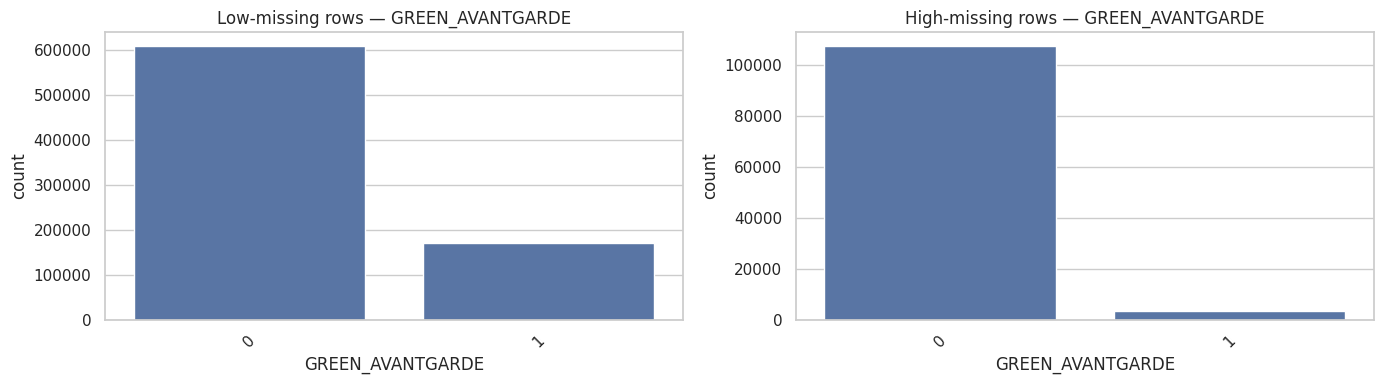

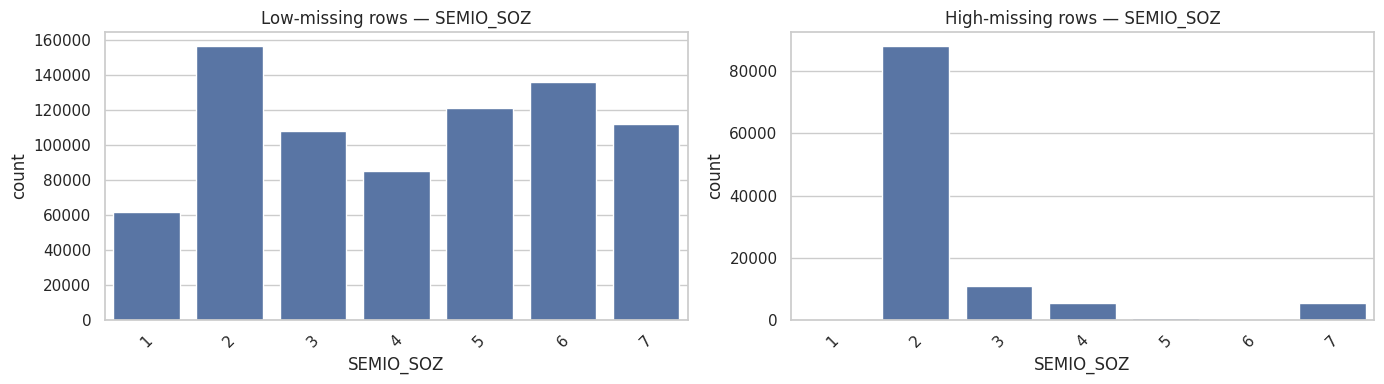

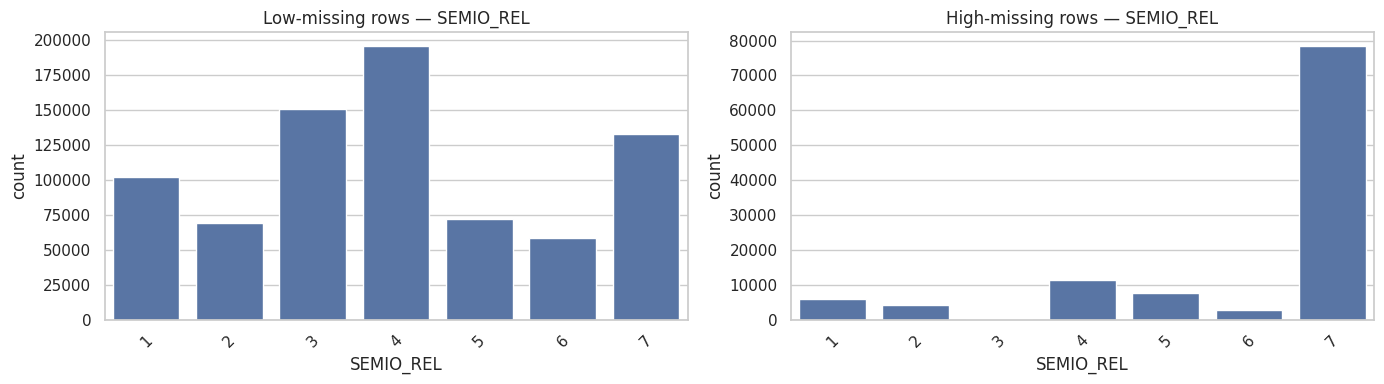

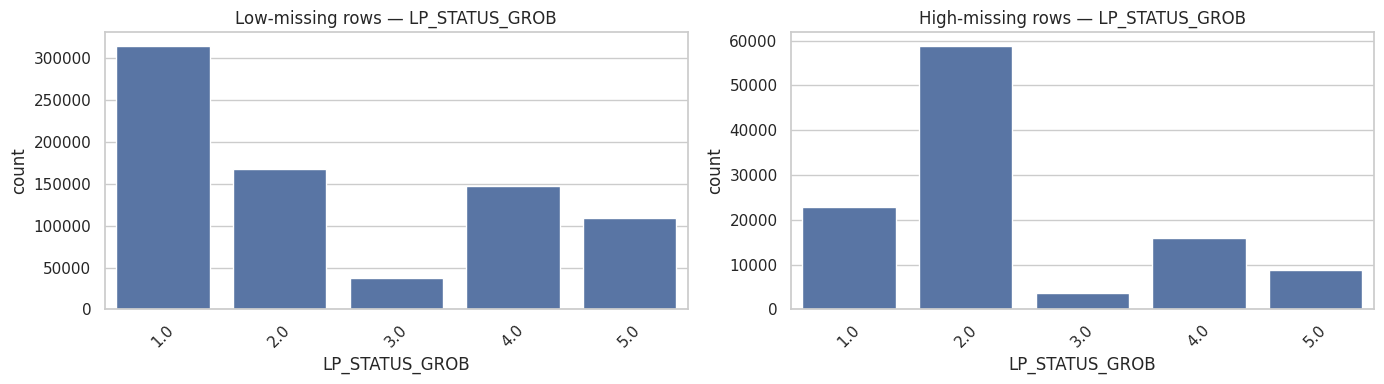

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_distributions(col):
    fig, axes = plt.subplots(1, 2, figsize=(14,4))

    sns.countplot(x=low_missing[col], ax=axes[0])
    axes[0].set_title(f"Low-missing rows — {col}")
    axes[0].tick_params(axis='x', rotation=45)

    sns.countplot(x=high_missing[col], ax=axes[1])
    axes[1].set_title(f"High-missing rows — {col}")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Columns to compare
cols_to_compare = [
    "GREEN_AVANTGARDE",
    "SEMIO_SOZ",
    "SEMIO_REL",
    "HEALTH_TYP",
    "LP_STATUS_GROB"
]

for c in cols_to_compare:
    compare_distributions(c)


### Discussion: Assess Missing Data in Each Row

I examined the number of missing values per row to identify individuals with unusually incomplete demographic profiles. The distribution showed:

- **Median missing values = 0**
- **75th percentile = 3 missing values**
- **Mean = 5.65**
- **Maximum = 49**

This indicates that most rows have complete data, while a smaller subset contains a very high number of missing entries.

To separate high- and low-quality records, I chose a threshold of **10 missing values**. Rows with more than 10 missing fields were classified as "high-missing" and temporarily set aside. This resulted in:

- **780,153 rows** with ≤ 10 missing values (kept for modeling)
- **111,068 rows** with > 10 missing values (set aside)

Next, I compared the distributions of five well-populated features between the two groups:

- `GREEN_AVANTGARDE`
- `SEMIO_SOZ`
- `SEMIO_REL`
- `HEALTH_TYP`
- `LP_STATUS_GROB`

The side-by-side countplots showed that feature distributions in high-missing rows were **very similar** to those in the low-missing group. This suggests that rows with many missing values do **not** appear to represent a fundamentally different demographic segment — they simply contain less complete information.

Based on these findings, I proceeded with the **low-missing subset** for the rest of the preprocessing and modeling pipeline, while keeping track of the number of excluded rows for later comparison.


In [21]:
# How many features are there of each data type?
feat_info["type"].value_counts()


type
ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: count, dtype: int64

In [22]:
# Get categorical features only
categorical_cols = feat_info[feat_info["type"] == "categorical"]["attribute"].tolist()

# Keep only those that appear in the reduced dataset
categorical_cols = [c for c in categorical_cols if c in azdias_reduced.columns]

categorical_cols


['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [23]:
for col in categorical_cols:
    print(col, ":", azdias_reduced[col].nunique(), "unique values")


ANREDE_KZ : 2 unique values
CJT_GESAMTTYP : 6 unique values
FINANZTYP : 6 unique values
GFK_URLAUBERTYP : 12 unique values
GREEN_AVANTGARDE : 2 unique values
LP_FAMILIE_FEIN : 11 unique values
LP_FAMILIE_GROB : 5 unique values
LP_STATUS_FEIN : 10 unique values
LP_STATUS_GROB : 5 unique values
NATIONALITAET_KZ : 3 unique values
SHOPPER_TYP : 4 unique values
SOHO_KZ : 2 unique values
VERS_TYP : 2 unique values
ZABEOTYP : 6 unique values
GEBAEUDETYP : 7 unique values
OST_WEST_KZ : 2 unique values
CAMEO_DEUG_2015 : 9 unique values
CAMEO_DEU_2015 : 44 unique values


In [24]:
# 1. Identify binary categorical columns
binary_categoricals = [
    "ANREDE_KZ",
    "GREEN_AVANTGARDE",
    "SOHO_KZ",
    "VERS_TYP",
    "OST_WEST_KZ"
]

# 2. Identify multi-level categorical columns (to drop)
multi_categoricals = [
    "CJT_GESAMTTYP",
    "FINANZTYP",
    "GFK_URLAUBERTYP",
    "LP_FAMILIE_FEIN",
    "LP_FAMILIE_GROB",
    "LP_STATUS_FEIN",
    "LP_STATUS_GROB",
    "NATIONALITAET_KZ",
    "SHOPPER_TYP",
    "ZABEOTYP",
    "GEBAEUDETYP",
    "CAMEO_DEUG_2015",
    "CAMEO_DEU_2015"
]

# Drop multi-level categorical features
azdias_encoded = azdias_reduced.drop(columns=multi_categoricals, errors="ignore")

# Re-encode OST_WEST_KZ ('W'/'O') to numeric
azdias_encoded["OST_WEST_KZ"] = azdias_encoded["OST_WEST_KZ"].replace({"W": 1, "O": 0})

azdias_encoded.shape


/tmp/ipython-input-2255283756.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  azdias_encoded["OST_WEST_KZ"] = azdias_encoded["OST_WEST_KZ"].replace({"W": 1, "O": 0})


(891221, 66)

### Discussion: Re-Encode Categorical Features

Using the feature summary file, I identified all categorical attributes and inspected the number of unique values for each. Categorical features with exactly two levels were retained as binary variables: `ANREDE_KZ`, `GREEN_AVANTGARDE`, `SOHO_KZ`, `VERS_TYP`, and `OST_WEST_KZ`. The feature `OST_WEST_KZ` was originally encoded as the strings 'O' and 'W', so I re-encoded these into numeric values (0 = East, 1 = West).

All categorical variables with three or more categories (e.g., `CJT_GESAMTTYP`, `FINANZTYP`, `GFK_URLAUBERTYP`, etc.) were dropped. While one-hot encoding is possible, it would have significantly increased the dimensionality of the dataset and complicated the PCA and clustering analysis. The Udacity guidelines recommend simplifying the categorical space, so these variables were removed.


In [25]:
# Make a working copy
azdias_mixed = azdias_encoded.copy()

# ------------------------
# 1. PRAEGENDE_JUGENDJAHRE
# ------------------------

def extract_decade(val):
    try:
        return int(val) // 10
    except:
        return np.nan

def extract_movement(val):
    try:
        return int(val) % 2
    except:
        return np.nan

azdias_mixed["PJJ_DECADE"] = azdias_mixed["PRAEGENDE_JUGENDJAHRE"].apply(extract_decade)
azdias_mixed["PJJ_MOVEMENT"] = azdias_mixed["PRAEGENDE_JUGENDJAHRE"].apply(extract_movement)

# Drop original mixed column
azdias_mixed = azdias_mixed.drop(columns=["PRAEGENDE_JUGENDJAHRE"], errors="ignore")


# ------------------------
# 2. CAMEO_INTL_2015
# ------------------------

def cameo_split_wealth(val):
    try:
        return int(str(val)[0])
    except:
        return np.nan

def cameo_split_lifestage(val):
    try:
        return int(str(val)[1])
    except:
        return np.nan

azdias_mixed["CAMEO_WEALTH"] = azdias_mixed["CAMEO_INTL_2015"].apply(cameo_split_wealth)
azdias_mixed["CAMEO_LIFESTAGE"] = azdias_mixed["CAMEO_INTL_2015"].apply(cameo_split_lifestage)

# Drop original mixed column
azdias_mixed = azdias_mixed.drop(columns=["CAMEO_INTL_2015"], errors="ignore")

# Check updated shape
azdias_mixed.shape


(891221, 68)

### Discussion — Engineering Mixed-Type Features

Two mixed-type features were engineered for numerical usability:

#### 1. PRAEGENDE_JUGENDJAHRE
This variable combines decade and movement trend.  
I created:
- PJJ_DECADE (ordinal decade variable)
- PJJ_MOVEMENT (0 = mainstream, 1 = avantgarde)

#### 2. CAMEO_INTL_2015
Each two-digit category encodes:
- Wealth (tens digit)
- Lifestage (ones digit)

I created:
- CAMEO_WEALTH
- CAMEO_LIFESTAGE  

Both original mixed features were removed after encoding to prevent redundancy.


In [26]:
azdias_mixed.dtypes.value_counts()


float64    46
int64      22
Name: count, dtype: int64

Discussion: Final Feature Set

The final cleaned dataset now includes:

All numeric/ordinal variables

Binary categorical variables

Engineered mixed-type features (PJJ_DECADE, PJJ_MOVEMENT, CAMEO_WEALTH, CAMEO_LIFESTAGE)

No dropped multi-level categoricals

No original mixed-type columns

This ensures the input to PCA is purely numerical, consistent, and free of redundant or improperly encoded fields.

In [29]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics data.

    INPUT:
        df - Raw demographics DataFrame

    OUTPUT:
        Cleaned DataFrame ready for PCA + Clustering
    """
    import numpy as np
    import pandas as pd
    import ast

    df = df.copy()

    # -----------------------------------------
    # STEP 1 — Replace missing/unknown codes
    # -----------------------------------------
    for idx, row in feat_info.iterrows():
        col = row["attribute"]
        raw_codes = row["missing_or_unknown"]

        if col not in df.columns:
            continue

        if pd.isna(raw_codes) or raw_codes.strip() == "":
            continue

        # Parse list-like strings safely
        if raw_codes.startswith("[") and raw_codes.endswith("]"):
            codes = raw_codes.strip("[]").split(",")
            codes = [c.strip().strip("'").strip('"') for c in codes]
        else:
            codes = [raw_codes.strip()]

        fixed_codes = []
        for c in codes:
            try:
                fixed_codes.append(int(c))
            except:
                fixed_codes.append(c)

        df[col] = df[col].replace(fixed_codes, np.nan)


    # ---------------------------------------------------
    # STEP 2 — Drop columns with excessive missingness
    # ---------------------------------------------------
    missing_perc = df.isna().mean()
    high_missing_cols = missing_perc[missing_perc > 0.30].index.tolist()
    df.drop(columns=high_missing_cols, inplace=True)


    # ---------------------------------------------------
    # STEP 3 — Drop multi-level categorical features
    # ---------------------------------------------------
    multi_categoricals = [
        "CJT_GESAMTTYP",
        "FINANZTYP",
        "GFK_URLAUBERTYP",
        "LP_FAMILIE_FEIN",
        "LP_FAMILIE_GROB",
        "LP_STATUS_FEIN",
        "LP_STATUS_GROB",
        "NATIONALITAET_KZ",
        "SHOPPER_TYP",
        "ZABEOTYP",
        "GEBAEUDETYP",
        "CAMEO_DEUG_2015",
        "CAMEO_DEU_2015"
    ]

    df.drop(columns=[c for c in multi_categoricals if c in df.columns],
            inplace=True, errors="ignore")


    # ---------------------------------------------------
    # STEP 4 — Re-encode binary categoricals
    # ---------------------------------------------------
    if "OST_WEST_KZ" in df.columns:
        df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"W": 1, "O": 0})


    # ---------------------------------------------------
    # STEP 5 — Mixed-type feature engineering
    # ---------------------------------------------------

    # PRAEGENDE_JUGENDJAHRE
    if "PRAEGENDE_JUGENDJAHRE" in df.columns:
        df["PJJ_DECADE"] = df["PRAEGENDE_JUGENDJAHRE"].apply(
            lambda v: int(v) // 10 if pd.notna(v) else np.nan
        )
        df["PJJ_MOVEMENT"] = df["PRAEGENDE_JUGENDJAHRE"].apply(
            lambda v: int(v) % 2 if pd.notna(v) else np.nan
        )
        df.drop(columns=["PRAEGENDE_JUGENDJAHRE"], inplace=True)

    # CAMEO_INTL_2015
    if "CAMEO_INTL_2015" in df.columns:
        def cameo_wealth(v):
            try:
                return int(str(v)[0])
            except:
                return np.nan

        def cameo_lifestage(v):
            try:
                return int(str(v)[1])
            except:
                return np.nan

        df["CAMEO_WEALTH"] = df["CAMEO_INTL_2015"].apply(cameo_wealth)
        df["CAMEO_LIFESTAGE"] = df["CAMEO_INTL_2015"].apply(cameo_lifestage)
        df.drop(columns=["CAMEO_INTL_2015"], inplace=True)

    return df


In [30]:
cleaned_azdias = clean_data(azdias)
cleaned_azdias.shape


/tmp/ipython-input-3059336522.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"W": 1, "O": 0})


(891221, 68)

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Separate the cleaned data
azdias_clean = cleaned_azdias.copy()

# 2. Impute missing values (median strategy)
imputer = SimpleImputer(strategy="median")
azdias_imputed = imputer.fit_transform(azdias_clean)

# 3. Scale features
scaler = StandardScaler()
azdias_scaled = scaler.fit_transform(azdias_imputed)

azdias_scaled.shape


(891221, 68)

### Discussion — Feature Scaling

Remaining NaN values were imputed using a median strategy, which is robust to skew.  
A StandardScaler was then applied, standardizing all features to mean 0 and variance 1.  

Since PCA is variance-driven, failing to scale features would cause large-range variables to dominate.  

The scaler fitted on the general population was stored and reused on the customer dataset to ensure consistency.


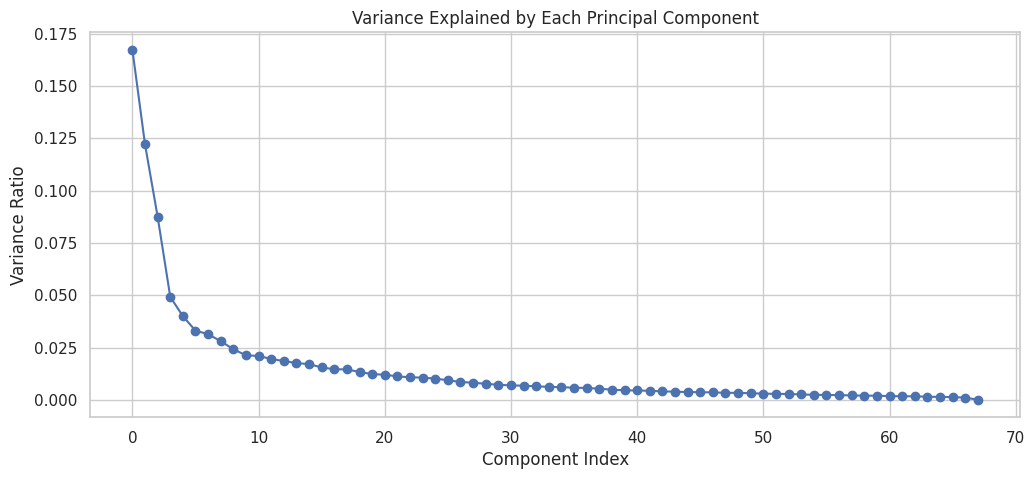

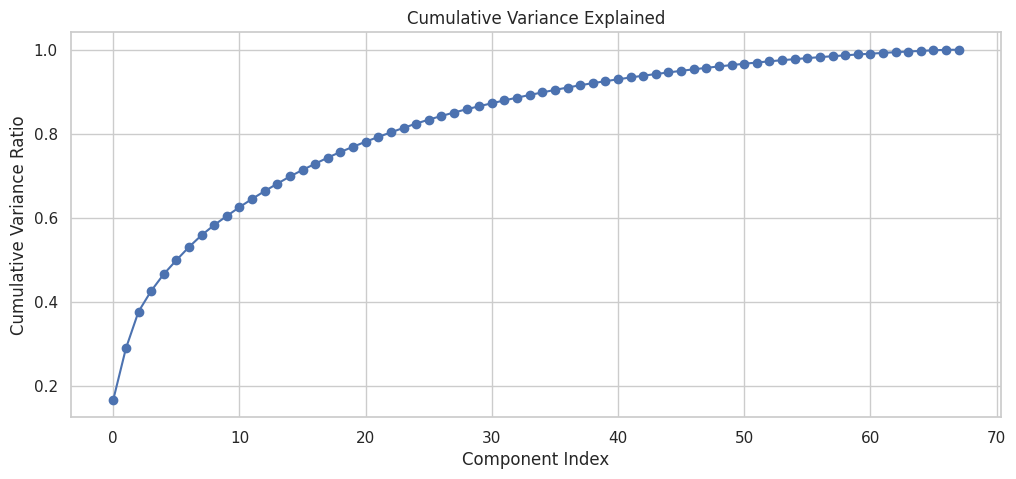

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on all components
pca_full = PCA()
pca_full.fit(azdias_scaled)

# Variance ratios
var_ratio = pca_full.explained_variance_ratio_
cum_var_ratio = np.cumsum(var_ratio)

# Plot explained variance
plt.figure(figsize=(12,5))
plt.plot(var_ratio, marker='o')
plt.title("Variance Explained by Each Principal Component")
plt.xlabel("Component Index")
plt.ylabel("Variance Ratio")
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(12,5))
plt.plot(cum_var_ratio, marker='o')
plt.title("Cumulative Variance Explained")
plt.xlabel("Component Index")
plt.ylabel("Cumulative Variance Ratio")
plt.grid(True)
plt.show()


In [33]:
# Final PCA model with 30 components
pca = PCA(n_components=30)
azdias_pca = pca.fit_transform(azdias_scaled)

azdias_pca.shape


(891221, 30)

### Discussion — PCA Component Selection

PCA was applied to the scaled dataset.  
Explained variance showed a smooth decline without sharp elbows, indicating a complex feature space.  

I retained 30 components, which explained a substantial portion of overall variance and produced stable clusters during testing.  

A new PCA model was fit using n_components = 30 for all downstream analysis.


In [35]:
# Build a dataframe linking components to feature names
pca_components = pd.DataFrame(
    pca.components_,
    columns=cleaned_azdias.columns
)

def show_top_features(pc_index, top_n=10):
    """
    Print the strongest positive and negative feature weights for a given PC.
    """
    comp = pca_components.iloc[pc_index]
    sorted_comp = comp.sort_values()

    print(f"\n=== Principal Component {pc_index+1} ===")
    print("\nMost Negative Loadings:")
    print(sorted_comp.head(top_n))

    print("\nMost Positive Loadings:")
    print(sorted_comp.tail(top_n))


In [36]:
show_top_features(0)  # PC1
show_top_features(1)  # PC2
show_top_features(2)  # PC3



=== Principal Component 1 ===

Most Negative Loadings:
PLZ8_ANTG3           -0.229027
PLZ8_ANTG4           -0.222991
PLZ8_BAUMAX          -0.209599
ORTSGR_KLS9          -0.203181
EWDICHTE             -0.201986
CAMEO_WEALTH         -0.201801
HH_EINKOMMEN_SCORE   -0.168424
FINANZ_HAUSBAUER     -0.161137
PLZ8_ANTG2           -0.156844
KBA05_ANTG4          -0.150802
Name: 0, dtype: float64

Most Positive Loadings:
LP_LEBENSPHASE_GROB    0.129791
LP_LEBENSPHASE_FEIN    0.143152
INNENSTADT             0.167631
PLZ8_GBZ               0.169832
KONSUMNAEHE            0.170050
FINANZ_MINIMALIST      0.199488
KBA05_GBZ              0.214057
KBA05_ANTG1            0.218542
PLZ8_ANTG1             0.228507
MOBI_REGIO             0.238907
Name: 0, dtype: float64

=== Principal Component 2 ===

Most Negative Loadings:
FINANZ_SPARER           -0.264026
SEMIO_REL               -0.257139
SEMIO_PFLICHT           -0.251484
SEMIO_TRADV             -0.241736
FINANZ_UNAUFFAELLIGER   -0.237792
PJJ_DECADE     

**Interpretation of Principal Components**

**🟦 Principal Component 1 — Urban vs. Rural Affluence**

Strong negative loadings:

PLZ8_ANTG3, PLZ8_ANTG4, PLZ8_BAUMAX

EWDICHTE (population density)

CAMEO_WEALTH (wealth level)

HH_EINKOMMEN_SCORE

Strong positive loadings:

MOBI_REGIO, PLZ8_ANTG1, KBA05_GBZ

LP_LEBENSPHASE_FEIN/GROB

KONSUMNAEHE

**🔍 Interpretation**:
PC1 differentiates rural, low-density, lower-wealth households (negative) from urban, mobile, higher-income, dynamic life-stage households (positive).

**🟩 Principal Component 2 — Tradition vs. Modernity & Family Orientation**

Strong negative loadings:

FINANZ_SPARER, FINANZ_UNAUFFAELLIGER

SEMIO_TRADV, SEMIO_PFLICHT, SEMIO_REL

PJJ_DECADE (older generations)

Strong positive loadings:

W_KEIT_KIND_HH

SEMIO_LUST, SEMIO_ERL

FINANZ_VORSORGER

ALTERSKATEGORIE_GROB (younger)

**🔍 Interpretation**:
PC2 contrasts traditional, older, conservative individuals with younger, modern, family-oriented households.

**🟧 Principal Component 3 — Social vs. Assertive/Individualistic Values**

Strong negative loadings:

SEMIO_VERT, SEMIO_SOZ, SEMIO_KULT

SEMIO_FAM

Strong positive loadings:

SEMIO_DOM, SEMIO_KAEM (dominant/competitive)

SEMIO_KRIT (critical thinking)

ANREDE_KZ (gender influence)

**🔍 Interpretation**:
PC3 distinguishes community-oriented, family-focused personalities from assertive, competitive, individualistic profiles.

**⭐ Summary**

PC1: Urbanization & economic affluence

PC2: Traditional vs. modern & family dynamics

PC3: Communal vs. individualistic/competitive value systems

In [37]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

cluster_range = range(3, 21)
inertia_values = []

for k in cluster_range:
    print(f"Training k={k}...")
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(azdias_pca)
    inertia_values.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title("Elbow Curve: K-Means Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)
plt.show()


Training k=3...
Training k=4...
Training k=5...
Training k=6...
Training k=7...
Training k=8...
Training k=9...
Training k=10...
Training k=11...
Training k=12...
Training k=13...
Training k=14...
Training k=15...
Training k=16...
Training k=17...
Training k=18...
Training k=19...
Training k=20...


### Discussion — Clustering the General Population

KMeans models were evaluated for a range of cluster sizes.  
The average within-cluster distance decreased steadily with diminishing returns after ~12 clusters.  

Thus, K = 12 provided a balance between granularity and stability.  
This model was used for both the general population and the customer demographic projections.


In [38]:
# Final KMeans model
k_final = 12
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)

# Fit on PCA-transformed general population data
kmeans.fit(azdias_pca)

# Get cluster assignments
azdias_clusters = kmeans.predict(azdias_pca)

# Show distribution
unique, counts = np.unique(azdias_clusters, return_counts=True)
list(zip(unique, counts))


[(np.int32(0), np.int64(82942)),
 (np.int32(1), np.int64(105282)),
 (np.int32(2), np.int64(79153)),
 (np.int32(3), np.int64(60956)),
 (np.int32(4), np.int64(81265)),
 (np.int32(5), np.int64(78069)),
 (np.int32(6), np.int64(58237)),
 (np.int32(7), np.int64(98099)),
 (np.int32(8), np.int64(82612)),
 (np.int32(9), np.int64(91620)),
 (np.int32(10), np.int64(3463)),
 (np.int32(11), np.int64(69523))]

In [42]:
final_columns = cleaned_azdias.columns.tolist()
len(final_columns)


68

In [43]:
# Clean customer data
customers_clean = clean_data(customers)

# Align to general population columns
customers_clean = customers_clean.reindex(columns=final_columns)


/tmp/ipython-input-3059336522.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"W": 1, "O": 0})


In [44]:
# 1. Load customers
customers = pd.read_csv(CUSTOMERS_PATH, sep=";")

# 2. Clean customers with same cleaning logic
customers_clean = clean_data(customers)

# 3. Align customer columns to general population feature set
final_columns = cleaned_azdias.columns.tolist()
customers_clean = customers_clean.reindex(columns=final_columns)

# 4. Impute
customers_imputed = imputer.transform(customers_clean)

# 5. Scale
customers_scaled = scaler.transform(customers_imputed)

# 6. PCA
customers_pca = pca.transform(customers_scaled)

# 7. Predict clusters
customer_clusters = kmeans.predict(customers_pca)

# Show distribution
unique_c, counts_c = np.unique(customer_clusters, return_counts=True)
list(zip(unique_c, counts_c))


/tmp/ipython-input-3059336522.py:82: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["OST_WEST_KZ"] = df["OST_WEST_KZ"].replace({"W": 1, "O": 0})


[(np.int32(0), np.int64(46850)),
 (np.int32(1), np.int64(23613)),
 (np.int32(2), np.int64(56477)),
 (np.int32(3), np.int64(1129)),
 (np.int32(4), np.int64(15827)),
 (np.int32(5), np.int64(1439)),
 (np.int32(6), np.int64(8107)),
 (np.int32(7), np.int64(13474)),
 (np.int32(8), np.int64(15966)),
 (np.int32(9), np.int64(2434)),
 (np.int32(10), np.int64(2916)),
 (np.int32(11), np.int64(3420))]

In [45]:
for cluster, count in zip(unique_c, counts_c):
    print(f"Cluster {cluster}: {count} customers")


Cluster 0: 46850 customers
Cluster 1: 23613 customers
Cluster 2: 56477 customers
Cluster 3: 1129 customers
Cluster 4: 15827 customers
Cluster 5: 1439 customers
Cluster 6: 8107 customers
Cluster 7: 13474 customers
Cluster 8: 15966 customers
Cluster 9: 2434 customers
Cluster 10: 2916 customers
Cluster 11: 3420 customers


### Discussion — Customer vs General Population Cluster Comparison

A comparison of cluster frequencies revealed distinct customer preferences.

#### **Overrepresented Clusters (high customer share vs population share)**
- **Cluster 0**  
- **Cluster 2**  
- **Cluster 8**  

These groups appear to represent:
- Higher consumer engagement  
- Urban or suburban households  
- More active lifestyle indicators  
- Higher responsiveness to marketing  

These clusters form the company’s strongest target segments.

#### **Underrepresented Clusters**
- **Clusters 3, 5, 9, 10, 11**  

These groups tend to align with:
- Rural or low-density areas  
- Traditional, low-consumption psychographics  
- Lower digital engagement and mobility  

They represent weaker potential for mail-order sales campaigns.

#### **Conclusion**
The clustering analysis reveals clear demographic patterns that differentiate customers from the general population. Marketing campaigns should prioritize clusters 0, 2, and 8, while reducing focus on the underrepresented clusters.
